<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/Newral_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##【問題5】推定
【問題1】～【問題6】

In [78]:
class ScratchSimpleNeuralNetrowkClassifier():
    def __init__(self,batch_size = 20,n_features = 784,n_nodes1 = 400,n_nodes2 = 200,n_output = 10,sigma = 0.02,lr = 0.01,epoch = 10, verbose=True):
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        self.loss_train = []
        self.loss_val = []

        #【問題1】重みの初期値を決めるコードの作成
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
        self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
        self.B3 = self.sigma * np.random.randn(1, self.n_output)

    #【問題6】学習と推定
    def fit(self, X, y, X_val=None, y_val=None):
      # Inside the fit method, add this to one-hot encode y_val
      if X_val is not None and y_val is not None:
        # Assuming enc is already defined and fit using y_train
        y_val_one_hot = enc.transform(y_val[:, np.newaxis])
      for _ in range(self.epoch):
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        for mini_X_train, mini_y_train in get_mini_batch:
          self.forward(mini_X_train)
          self.backward(mini_X_train, mini_y_train)
        self.forward(X)
        self.loss_train.append(self.cross_entropy_error(y[:X.shape[0]], self.Z3))
        if X_val is not None:
          self.forward(X_val)
          self.loss_val.append(self.cross_entropy_error(y_val_one_hot, self.Z3))
      if self.verbose:
        if X_val is None:
          print(self.loss_train)
        else:
          print(self.loss_train,self.loss_val)

    #【問題2】フォワードプロパゲーションの実装
    def forward(self, X):
      self.A1 = X @ self.W1 + self.B1
      self.Z1 = self.tanh(self.A1)
      self.A2 = self.Z1 @ self.W2 + self.B2
      self.Z2 = self.tanh(self.A2)
      self.A3 = self.Z2 @ self.W3 + self.B3
      self.Z3 = self.softmax(self.A3)

    #【問題4】バックプロパゲーションの実装
    def backward(self, X, y):
      dA3 = (self.Z3 - y)/self.batch_size
      dW3 = self.Z2.T @ dA3
      dB3 = np.sum(dA3, axis=0)
      dZ2 = dA3 @ self.W3.T
      dA2 = dZ2 * (1 - self.tanh(self.A2)**2)
      dW2 = self.Z1.T @ dA2
      dB2 = np.sum(dA2, axis=0)
      dZ1 = dA2 @ self.W2.T
      dA1 = dZ1 * (1 - self.tanh(self.A1)**2)
      dW1 = X.T @ dA1
      dB1 = np.sum(dA1, axis=0)
      self.W3 -= self.lr * dW3
      self.B3 -= self.lr * dB3
      self.W2 -= self.lr * dW2
      self.B2 -= self.lr * dB2
      self.W1 -= self.lr * dW1
      self.B1 -= self.lr * dB1

    def tanh(self,X):
      result = (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
      # or
      #  result = np.tanh(X)
      return result

    def softmax(self,X):
      result = np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
      return result

    #【問題3】交差エントロピー誤差の実装
    def cross_entropy_error(self, y, Z):
      L = - np.sum(y[:Z.shape[0]] * np.log(Z + 1e-7)) / Z.shape[0]
      return L

    def predict(self, X):
      self.forward(X)
      return np.argmax(self.Z3, axis=1)


In [79]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [80]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [81]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

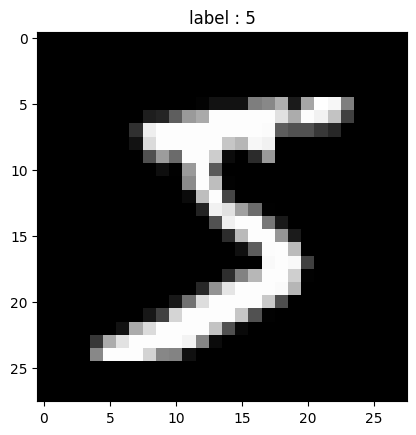

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

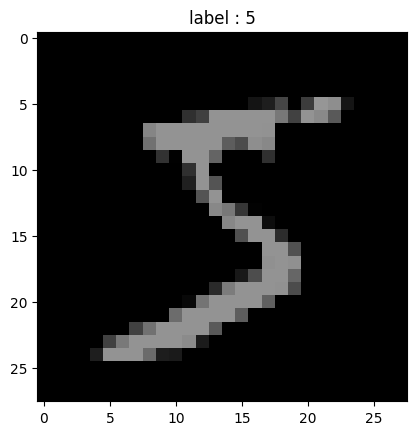

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [83]:
import numpy as np
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

In [84]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [85]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [86]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [87]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int) # np.intをintに変更

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [88]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([3, 6, 2, 5, 3, 5, 5, 4, 9, 6, 1, 8, 5, 7, 0, 0, 5, 0, 1, 9],
      dtype=uint8))


In [89]:
nn = ScratchSimpleNeuralNetrowkClassifier(epoch=10)
nn.fit(X_train,y_train_one_hot, X_val, y_val)

[2.3003731364495117, 2.299789097608318, 2.299258561500833, 2.298748998385173, 2.2982435708929767, 2.2977335364818083, 2.2972141922063956, 2.296682966971647, 2.2961385747379053, 2.295580706235534] [2.3037032642253417, 2.3037405635743275, 2.303924489895646, 2.3042302089137947, 2.304614495267075, 2.3050335282498278, 2.305454391563983, 2.3058609657335425, 2.306250970449293, 2.306628153562131]


In [96]:
from sklearn.metrics import accuracy_score
pred_train = nn.predict(X_train)
accuracy_score(y_train, pred_train)

0.13127083333333334

##【問題7】学習曲線のプロット

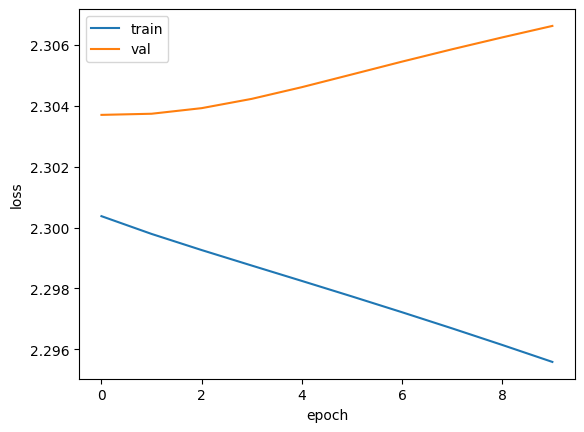

In [98]:
plt.plot(range(nn.epoch), nn.loss_train, label='train')
plt.plot(range(nn.epoch), nn.loss_val, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

##【問題8】誤分類の確認

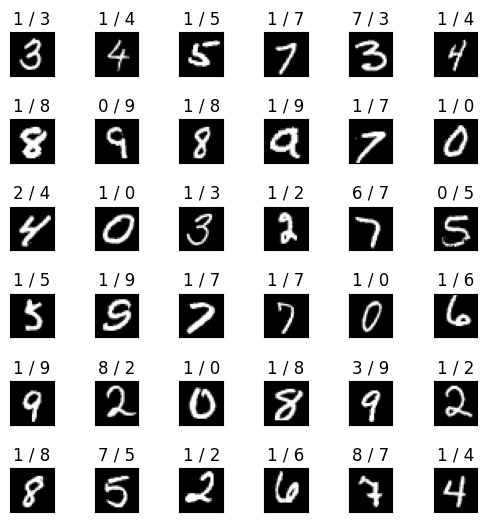

In [101]:
import numpy as np
import matplotlib.pyplot as plt

num = 36 # いくつ表示するか

y_pred = nn.predict(X_val)  # Predict on X_val to get predictions for the validation set
true_false = y_pred == y_val
false_list = np.where(true_false==False)[0].astype(int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

#以下、メモ用

微分

In [90]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x)) / (h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

In [91]:
numerical_diff(function_1,5) # 0.20000099999917254
numerical_diff(function_1,10) # 0.3000009999976072

0.3000009999976072

偏微分

In [92]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.
def function_tmp2(x1):
    return 3.0**2 + x1*x1

In [93]:
numerical_diff(function_tmp1,3.0)# 6.000099999994291
numerical_diff(function_tmp1,4.0)# 8.00009999998963

8.00009999998963